# Week4 - Lab

Take a look at this toy dataset. Perform the following operations
* Train-test split
* Train a linear regression model
* Evaluate/create residual plots
* Explain findings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv')

In [2]:
data1.head()

,Unnamed: 0,X,y
0,0,50,147
1,1,82,246
2,2,66,207
3,3,35,105
4,4,81,240


In [3]:
X = data1[['X']]
y = data1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [4]:
np = Pipeline([('imputer_np', SimpleImputer(strategy='median')), ('scaler_np', StandardScaler()), ])
model = LinearRegression()
model_pipeline = Pipeline([('preprocessing', np),('model_lr', model)])
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R2 score is :', r2)

R2 score is : 0.9872328017796749


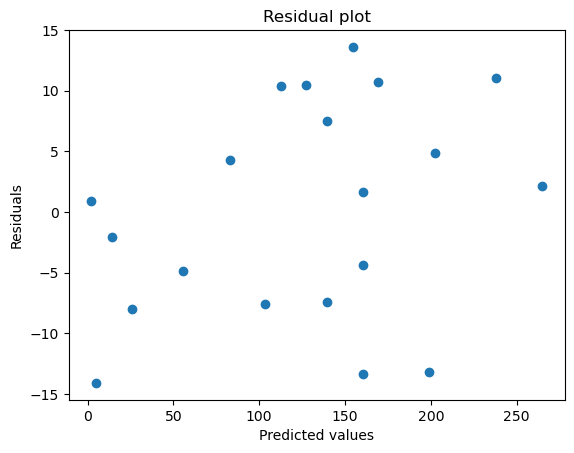

In [5]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

In [6]:
data2.head()

,Unnamed: 0,X1,X2,y
0,0,50,B,2510
1,1,82,B,6738
2,2,66,B,4355
3,3,35,A,2225
4,4,81,A,7560


In [7]:
X = data2[['X1', 'X2']]
y = data2['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
features_numerical = ["X1"]
features_categorical = ["X2"]

In [8]:
np2 = Pipeline([('imputer_np', SimpleImputer(strategy='median')), ('scaler_np', StandardScaler()), ])
cp = Pipeline([('imputer_cp', SimpleImputer(strategy='most_frequent')), ('encoder_cp', OneHotEncoder(handle_unknown='ignore', drop='first')),])
preprocessor = ColumnTransformer([('np_preprocessing', np2, features_numerical),('cp_preprocessing', cp, features_categorical)])


model2 = LinearRegression()
model_pipeline2 = Pipeline([('preprocessing', preprocessor),('model_lr', model2)])
model_pipeline2.fit(X_train, y_train)
y_pred = model_pipeline2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R2 score is :', r2)

R2 score is : 0.876847136426577


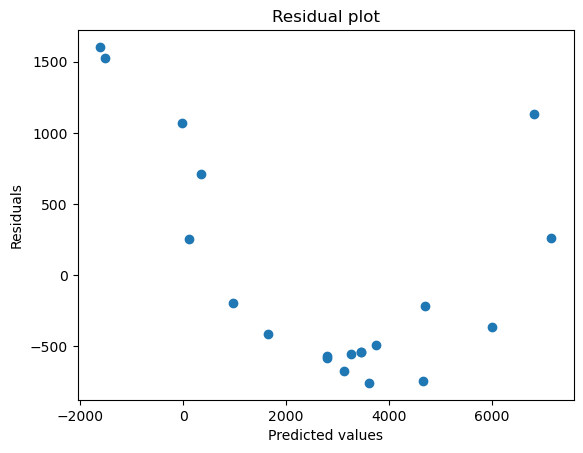

In [9]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()